# Scituffy Data Science 
Esplora la Potenza dell'Algoritmo ad Albero Decisionale: Una Guida Completa al Classificatore a Albero Decisionale

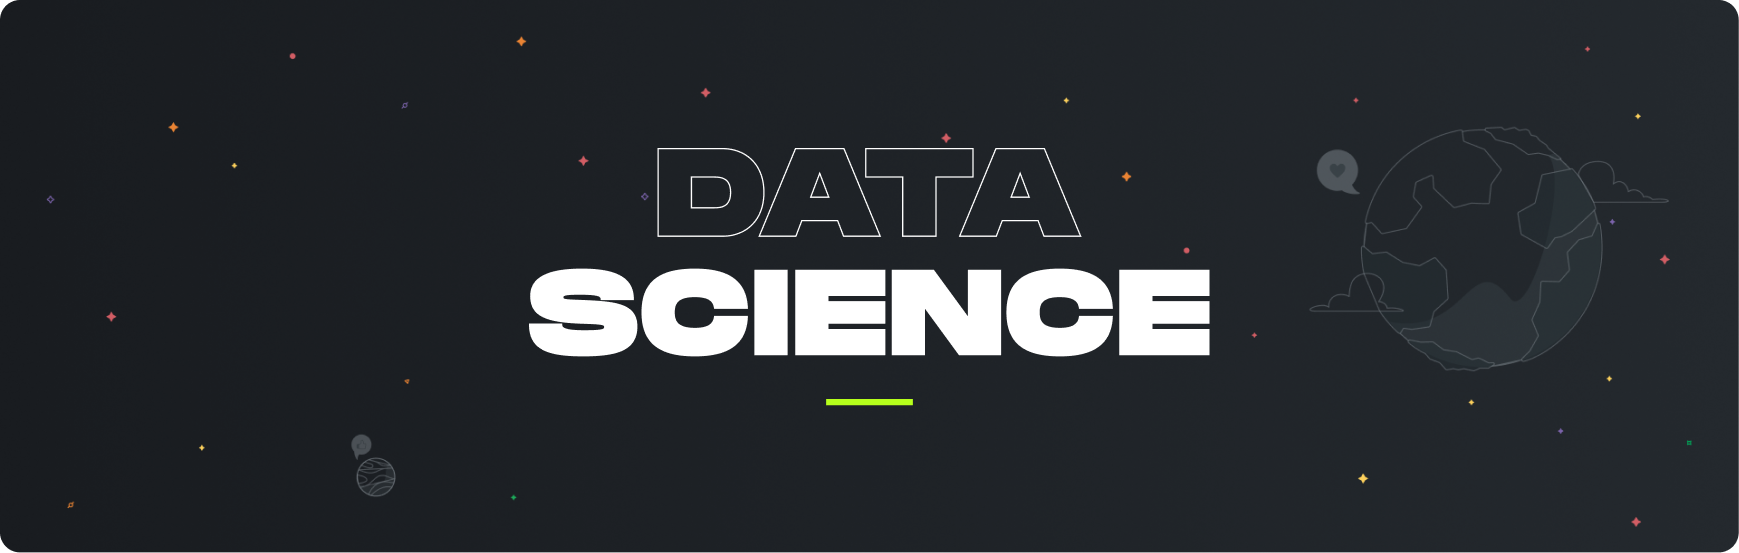



# **Decision Tree Classifier** • Impariamo ad addestrare gli algoritmi

##### *Introduzione:*
Il classificatore a albero decisionale è uno dei concetti più potenti e popolari nell'ambito dell'apprendimento automatico e dell'intelligenza artificiale. Questo algoritmo offre un approccio intuitivo e altamente interpretabile alla classificazione dei dati, rendendolo una scelta ideale per una vasta gamma di applicazioni. Questa guida completa esplorerà i fondamenti, le applicazioni e le best practice associate al classificatore a albero decisionale.
Oggi impariamo come creare un intero modello di albero decisionale per algoritmi di classificazione

🐋 Accessare la pagina del progetto [cliccando qui](https://www.notion.so/enzoschitini/Decision-Tree-Classifier-Impariamo-ad-addestrare-gli-algoritmi-3951d294bf36438ca6905284e5382455?pvs=4)

📕 [Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

## Importando risorsi e i dati

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

- Banche dati

In [94]:
df = sns.load_dataset('titanic')
df = df.drop_duplicates()

In [95]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [96]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


In [97]:
df.reset_index(drop=True, inplace=True)

In [98]:
percentage = round(((df.isnull().sum() / len(df)) * 100), 2)
percentage

survived        0.00
pclass          0.00
sex             0.00
age            13.52
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.26
class           0.00
who             0.00
adult_male      0.00
deck           74.23
embark_town     0.26
alive           0.00
alone           0.00
dtype: float64

In [99]:
# Rimuovere tutte le colonne che hanno dati nulli
df.dropna(axis=1, inplace=True)
print(round(((df.isnull().sum() / len(df)) * 100), 2))

survived      0.0
pclass        0.0
sex           0.0
sibsp         0.0
parch         0.0
fare          0.0
class         0.0
who           0.0
adult_male    0.0
alive         0.0
alone         0.0
dtype: float64


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   pclass      784 non-null    int64   
 2   sex         784 non-null    object  
 3   sibsp       784 non-null    int64   
 4   parch       784 non-null    int64   
 5   fare        784 non-null    float64 
 6   class       784 non-null    category
 7   who         784 non-null    object  
 8   adult_male  784 non-null    bool    
 9   alive       784 non-null    object  
 10  alone       784 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 51.6+ KB


In [101]:
df.drop('pclass',axis=1, inplace= True)

## Trasformazione delle variabili in Dimmies (flag)

In [102]:
df.head(5)

,survived,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,male,1,0,7.2500,Third,man,True,no,False
1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,female,0,0,7.9250,Third,woman,False,yes,True
3,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,male,0,0,8.0500,Third,man,True,no,True


In [103]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [104]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

- Variabili che hanno più di una sola categoria

In [105]:
df = pd.get_dummies(df, columns=['class','who'], drop_first=True)
df.head(5)

,survived,sex,sibsp,parch,fare,adult_male,alive,alone,class_Second,class_Third,who_man,who_woman
0,0,male,1,0,7.2500,True,no,False,False,True,True,False
1,1,female,1,0,71.2833,False,yes,False,False,False,False,True
2,1,female,0,0,7.9250,False,yes,True,False,True,False,True
3,1,female,1,0,53.1000,False,yes,False,False,False,False,True
4,0,male,0,0,8.0500,True,no,True,False,True,True,False


### Mapping
Variabili che possono assumere due valori diversi

In [106]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [107]:
df.sex = df.sex.map({'female': 1, 'male':0})

In [108]:
df.sex.unique()

array([0, 1], dtype=int64)

### Cambiando i tipi delle vatiabili

In [109]:
df.drop(columns='alive', axis=1, inplace=True)

In [110]:
df.dtypes

survived          int64
sex               int64
sibsp             int64
parch             int64
fare            float64
adult_male         bool
alone              bool
class_Second       bool
class_Third        bool
who_man            bool
who_woman          bool
dtype: object

In [111]:
df.adult_male = df.adult_male.astype(int)
df.alone  = df.alone.astype(int)

In [112]:
df.dtypes

survived          int64
sex               int64
sibsp             int64
parch             int64
fare            float64
adult_male        int32
alone             int32
class_Second       bool
class_Third        bool
who_man            bool
who_woman          bool
dtype: object

### Staccando le variabili dalla Target

In [113]:
y = df.survived
X = df.drop(columns='survived', axis=1)

## L'albero decisionale per la classificazione

In [114]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [115]:
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

[Text(0.47796610169491527, 0.9736842105263158, 'who_man <= 0.5\ngini = 0.485\nsamples = 784\nvalue = [461, 323]\nclass = Died'),
 Text(0.21620762711864408, 0.9210526315789473, 'class_Third <= 0.5\ngini = 0.408\nsamples = 333\nvalue = [95, 238]\nclass = Survived'),
 Text(0.10762711864406779, 0.868421052631579, 'fare <= 28.856\ngini = 0.096\nsamples = 178\nvalue = [9, 169]\nclass = Survived'),
 Text(0.07966101694915254, 0.8157894736842105, 'fare <= 28.231\ngini = 0.176\nsamples = 72\nvalue = [7, 65]\nclass = Survived'),
 Text(0.07288135593220339, 0.7631578947368421, 'parch <= 0.5\ngini = 0.155\nsamples = 71\nvalue = [6, 65]\nclass = Survived'),
 Text(0.05084745762711865, 0.7105263157894737, 'alone <= 0.5\ngini = 0.201\nsamples = 44\nvalue = [5, 39]\nclass = Survived'),
 Text(0.02711864406779661, 0.6578947368421053, 'fare <= 22.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = Survived'),
 Text(0.013559322033898305, 0.6052631578947368, 'fare <= 17.429\ngini = 0.444\nsamples = 3\nvalu

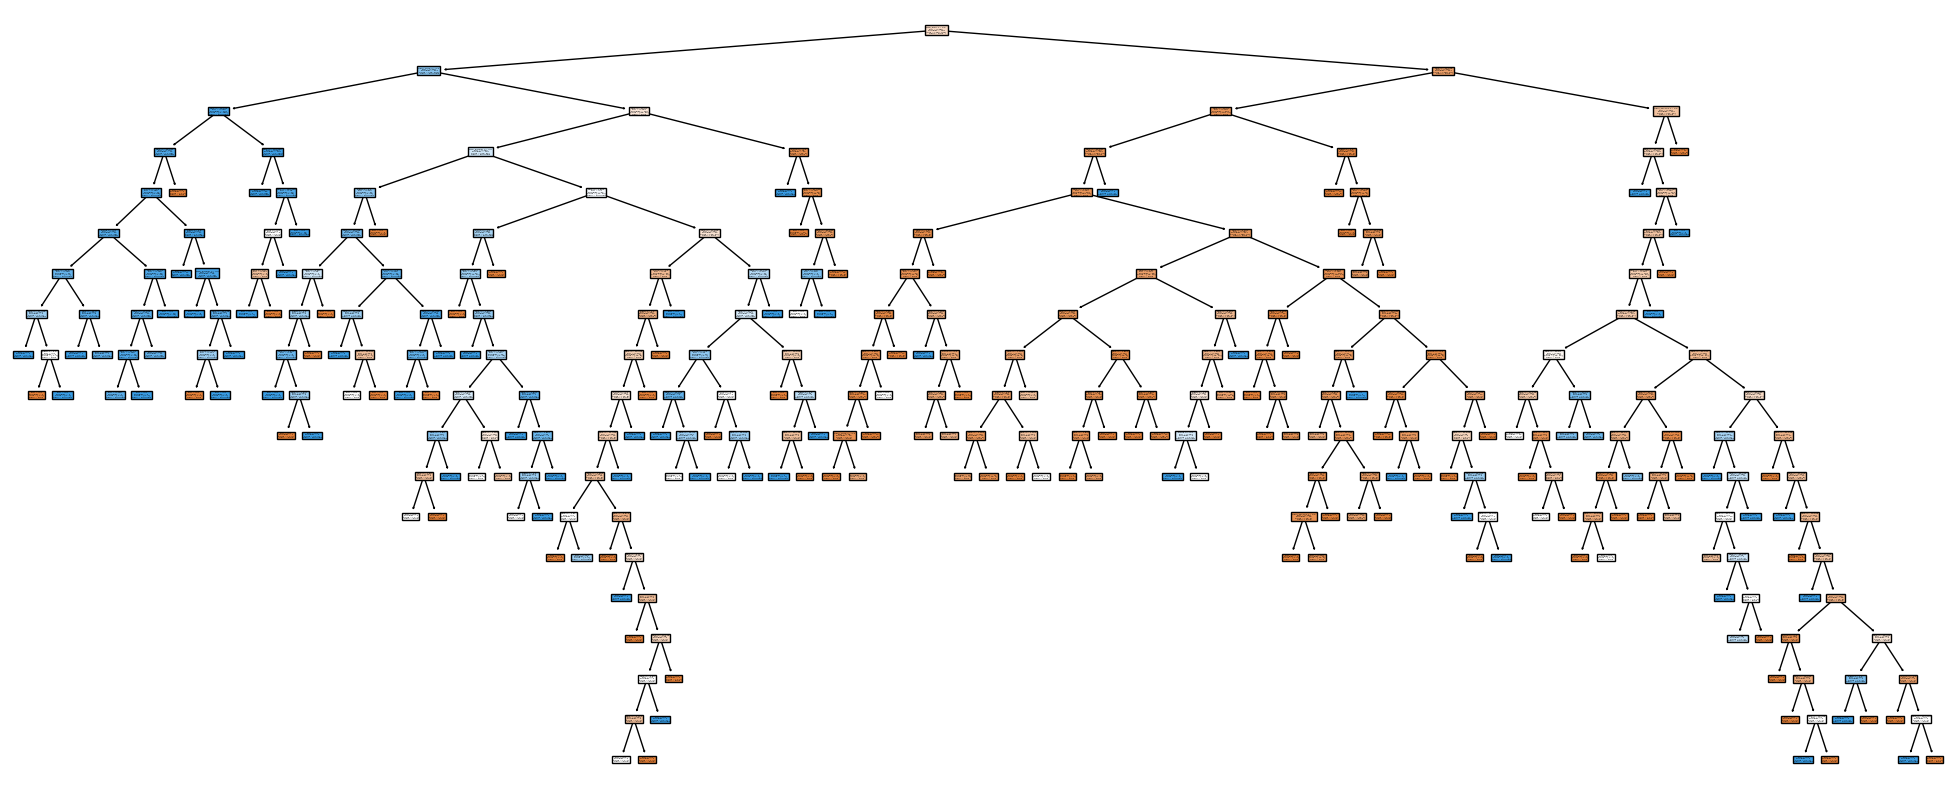

In [116]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Died', 'Survived'],
          feature_names=X.columns)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

- Adesso facciamo le previsioni e giudichiamo il nostro modello

In [118]:
y_pred = clf.predict(X_test)

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[138,   6],
       [ 14,  78]], dtype=int64)

C:\Users\Soldado\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


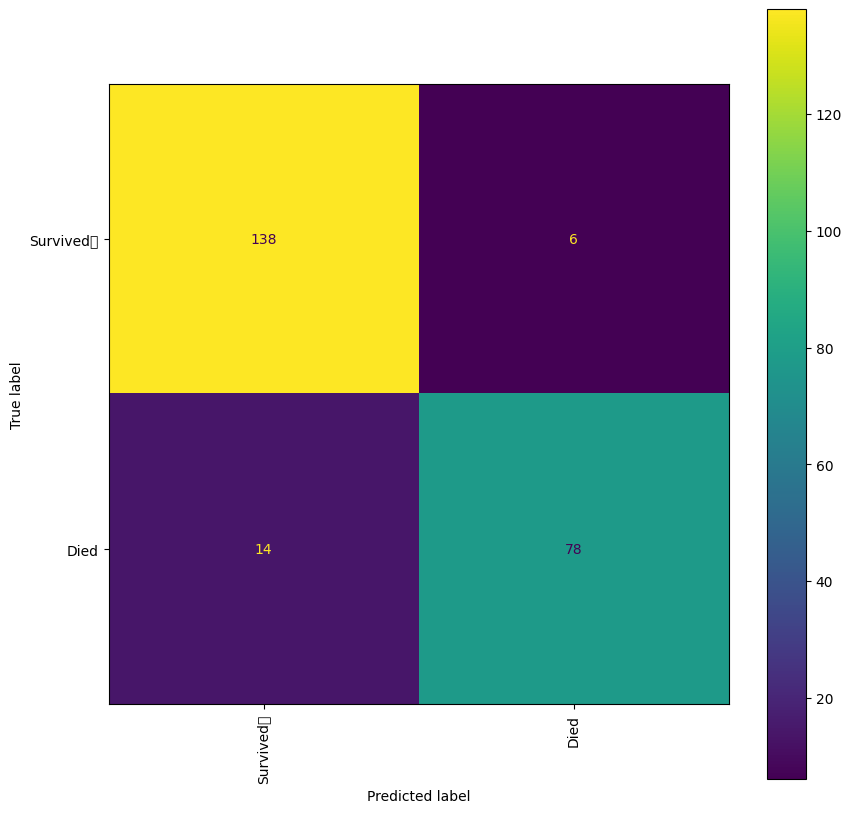

In [119]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Survived	', 'Died'])
fig, ax = plt.subplots(figsize=[10, 10])
display.plot(ax=ax, xticks_rotation="vertical")
plt.show()

In [120]:
predict = clf.predict(X)
#predict

In [121]:
accuratezza = round((accuracy_score(y, predict)), 3) * 100
print(f"L'accuratezza del modello è: {accuratezza}")

L'accuratezza del modello è: 91.7


- Secondo albero

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [123]:
clf2 = DecisionTreeClassifier(random_state=100)
clf2 = clf2.fit(X_train, y_train)

In [124]:
predict2 = clf2.predict(X_test)
predict2

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [125]:
y_pred = clf.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[313,   4],
       [ 41, 190]], dtype=int64)

In [126]:
predict = clf.predict(X_train)
accuratezza = round((accuracy_score(y_train, predict)), 3) * 100
print(f"L'accuratezza del modello è: {accuratezza}")

L'accuratezza del modello è: 91.8


In [127]:
y_pred = clf2.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[111,  33],
       [ 24,  68]], dtype=int64)

In [128]:
predict = clf2.predict(X_test)
accuratezza = round((accuracy_score(y_test, predict)), 3) * 100
print(f"L'accuratezza del modello è: {accuratezza}")

L'accuratezza del modello è: 75.8


## Pre pruing

- La profondità

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [130]:
clf = DecisionTreeClassifier(max_depth=2 ,random_state=100)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.7923728813559322

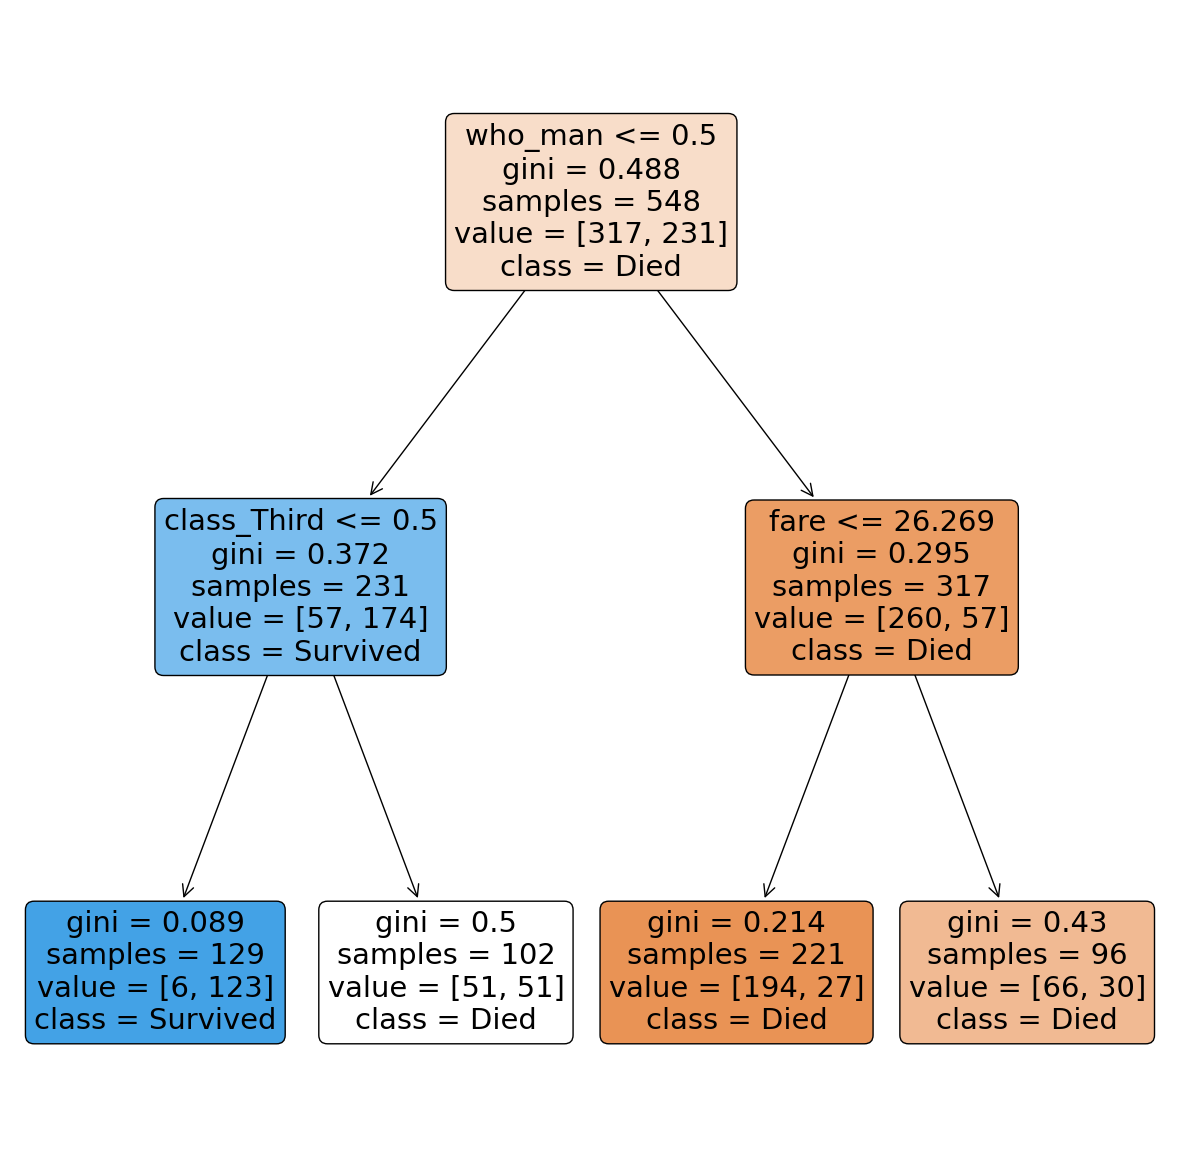

In [131]:
plt.figure(figsize=[15, 15])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Died', 'Survived'],
          feature_names=X_train.columns);

### Campioni sul foglio (valore minimo)

In [132]:
clf = DecisionTreeClassifier(min_samples_leaf=80, random_state=100)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.7923728813559322

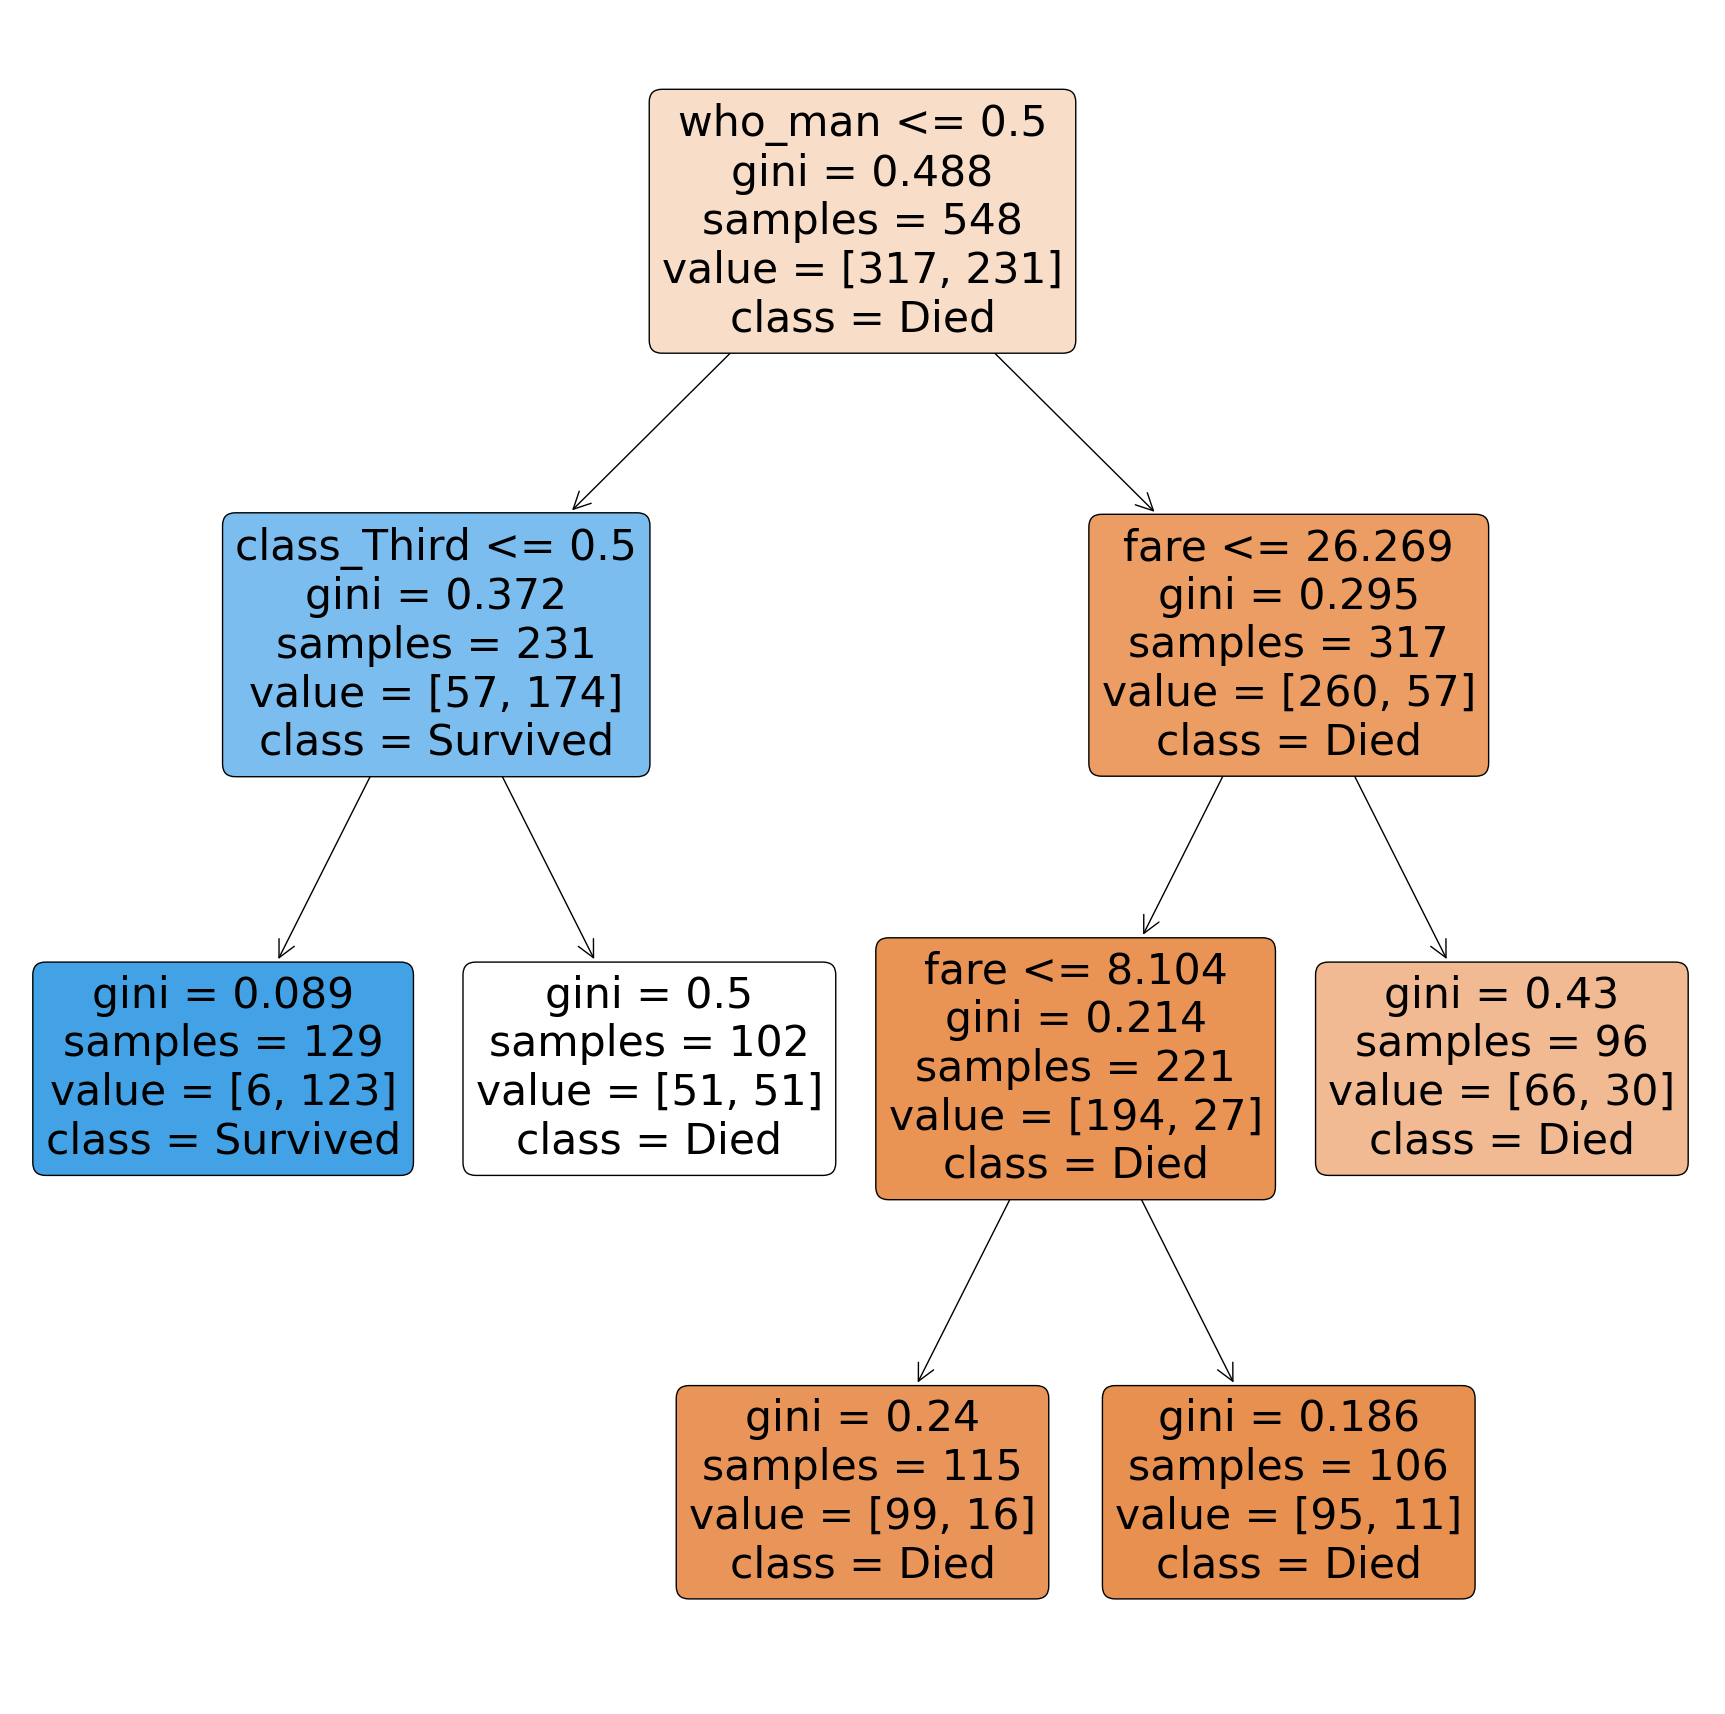

In [133]:
plt.figure(figsize=[22, 22])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Died', 'Survived'],
          feature_names=X_train.columns);

### Campioni sul foglio e profondità

In [134]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)
#clf = clf.fit(X, y)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.7584745762711864

In [135]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[111,  33],
       [ 24,  68]], dtype=int64)

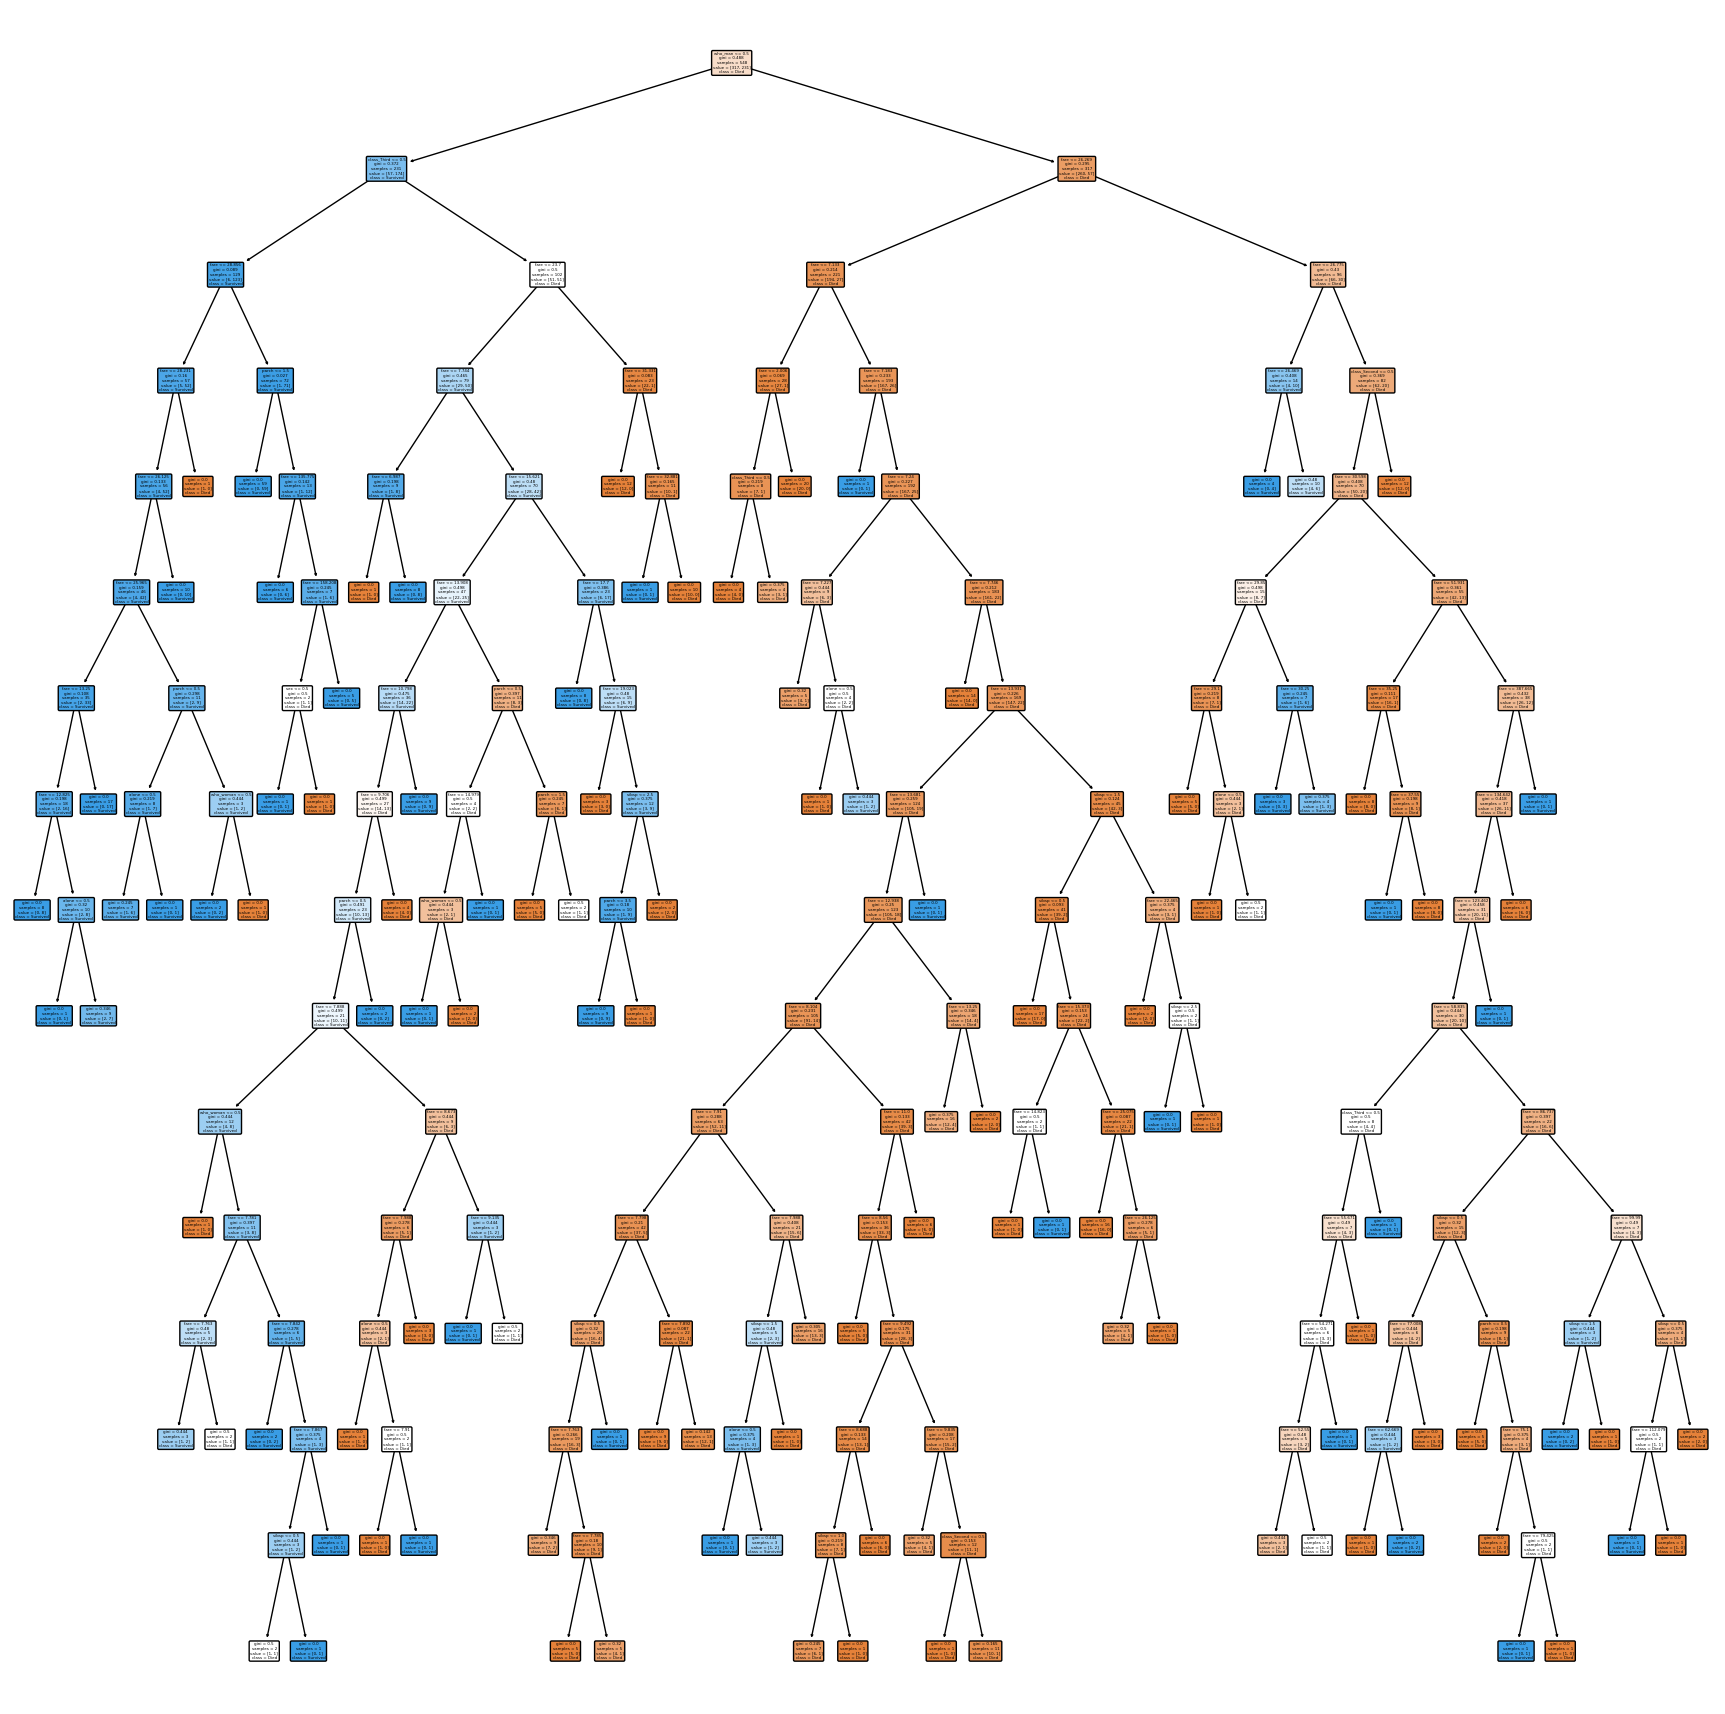

In [136]:
plt.figure(figsize=[22, 22])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Died', 'Survived'],
          feature_names=X_train.columns);

### Post pruning